In [ ]:
# Regresja liniowa domy model przykładowy z danych z kaggle

In [1]:
# instalujemy paczki
import pandas as pd
import seaborn as sns
import numpy as np



In [ ]:
#otwarcie danych

In [2]:
data =pd.read_csv('C:/Dane/2_Regresja_01/data1.csv')

In [ ]:
#wyświetlanie po nagłówkach

In [30]:
data.head()

,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,sqft_above,sqft_basement,yr_built,yr_renovated,street,city,statezip,country
0,2014-05-02 00:00:00,313000.0,3.0,1.50,1340,7912,1.5,0,0,3,1340,0,1955,2005,18810 Densmore Ave N,Shoreline,WA 98133,USA
1,2014-05-02 00:00:00,2384000.0,5.0,2.50,3650,9050,2.0,0,4,5,3370,280,1921,0,709 W Blaine St,Seattle,WA 98119,USA
2,2014-05-02 00:00:00,342000.0,3.0,2.00,1930,11947,1.0,0,0,4,1930,0,1966,0,26206-26214 143rd Ave SE,Kent,WA 98042,USA
3,2014-05-02 00:00:00,420000.0,3.0,2.25,2000,8030,1.0,0,0,4,1000,1000,1963,0,857 170th Pl NE,Bellevue,WA 98008,USA
4,2014-05-02 00:00:00,550000.0,4.0,2.50,1940,10500,1.0,0,0,4,1140,800,1976,1992,9105 170th Ave NE,Redmond,WA 98052,USA


In [4]:
data.tail()

,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,sqft_above,sqft_basement,yr_built,yr_renovated,street,city,statezip,country
4595,2014-07-09 00:00:00,308166.666667,3.0,1.75,1510,6360,1.0,0,0,4,1510,0,1954,1979,501 N 143rd St,Seattle,WA 98133,USA
4596,2014-07-09 00:00:00,534333.333333,3.0,2.50,1460,7573,2.0,0,0,3,1460,0,1983,2009,14855 SE 10th Pl,Bellevue,WA 98007,USA
4597,2014-07-09 00:00:00,416904.166667,3.0,2.50,3010,7014,2.0,0,0,3,3010,0,2009,0,759 Ilwaco Pl NE,Renton,WA 98059,USA
4598,2014-07-10 00:00:00,203400.000000,4.0,2.00,2090,6630,1.0,0,0,3,1070,1020,1974,0,5148 S Creston St,Seattle,WA 98178,USA
4599,2014-07-10 00:00:00,220600.000000,3.0,2.50,1490,8102,2.0,0,0,4,1490,0,1990,0,18717 SE 258th St,Covington,WA 98042,USA


In [ ]:
#osatnie 5 rzędów/wierszy dla sprawdzenia

In [ ]:
# Sprawdzam kolumny moich danych

In [5]:
data.columns

Index(['date', 'price', 'bedrooms', 'bathrooms', 'sqft_living', 'sqft_lot',
       'floors', 'waterfront', 'view', 'condition', 'sqft_above',
       'sqft_basement', 'yr_built', 'yr_renovated', 'street', 'city',
       'statezip', 'country'],
      dtype='object')

In [ ]:
# kształt danych bez () na końcu bo nie jest callable

In [6]:
data.shape

(4600, 18)

In [ ]:
#4600 wierszy 18 kolumn

In [8]:
#To samo tylko dokładniej mozna uzyskać; meann najczęsciej pojawiające się
data.describe()

,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,sqft_above,sqft_basement,yr_built,yr_renovated
count,4.600000e+03,4600.000000,4600.000000,4600.000000,4.600000e+03,4600.000000,4600.000000,4600.000000,4600.000000,4600.000000,4600.000000,4600.000000,4600.000000
mean,5.519630e+05,3.400870,2.160815,2139.346957,1.485252e+04,1.512065,0.007174,0.240652,3.451739,1827.265435,312.081522,1970.786304,808.608261
std,5.638347e+05,0.908848,0.783781,963.206916,3.588444e+04,0.538288,0.084404,0.778405,0.677230,862.168977,464.137228,29.731848,979.414536
min,0.000000e+00,0.000000,0.000000,370.000000,6.380000e+02,1.000000,0.000000,0.000000,1.000000,370.000000,0.000000,1900.000000,0.000000
25%,3.228750e+05,3.000000,1.750000,1460.000000,5.000750e+03,1.000000,0.000000,0.000000,3.000000,1190.000000,0.000000,1951.000000,0.000000
50%,4.609435e+05,3.000000,2.250000,1980.000000,7.683000e+03,1.500000,0.000000,0.000000,3.000000,1590.000000,0.000000,1976.000000,0.000000
75%,6.549625e+05,4.000000,2.500000,2620.000000,1.100125e+04,2.000000,0.000000,0.000000,4.000000,2300.000000,610.000000,1997.000000,1999.000000
max,2.659000e+07,9.000000,8.000000,13540.000000,1.074218e+06,3.500000,1.000000,4.000000,5.000000,9410.000000,4820.000000,2014.000000,2014.000000


In [ ]:
#Etap 3 modelowanie 
# Wizualizacja danych aby zobaczyć zaleznosci miedzy danymi. Szukamy najpierw nulli i wartości brakujacych porządkujemy dane.


In [ ]:
# 1 sprawdzamy nulle i sumujemy je ile tego jest musimy wiedzieć.

In [9]:
data.isnull().sum()

date             0
price            0
bedrooms         0
bathrooms        0
sqft_living      0
sqft_lot         0
floors           0
waterfront       0
view             0
condition        0
sqft_above       0
sqft_basement    0
yr_built         0
yr_renovated     0
street           0
city             0
statezip         0
country          0
dtype: int64

In [ ]:
# nie ma nulli w tych danych

In [ ]:
#ja jest do 10 braków null to można usunąc te wiersze. Powyżej 10 to w te pla wstawiamy mean value. jak jest wartość zero bo ktoś nie wiedzial iel jest sypialni to mean jest 3.37 czyli można tow stawić.

In [ ]:
# 2. Wizualizacja danych 

In [ ]:
# Wizualizacja ceny od liczby sypialni



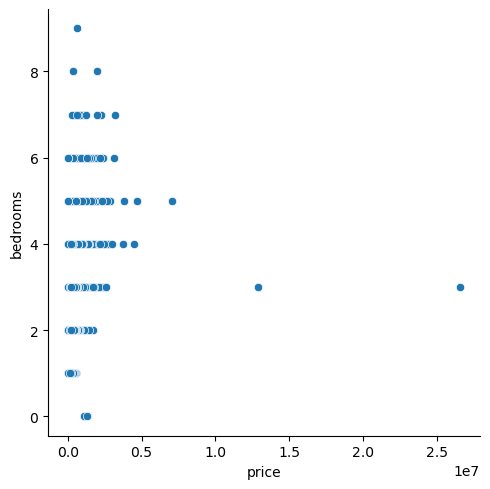

In [10]:
sns.relplot(x='price', y='bedrooms',data=data)

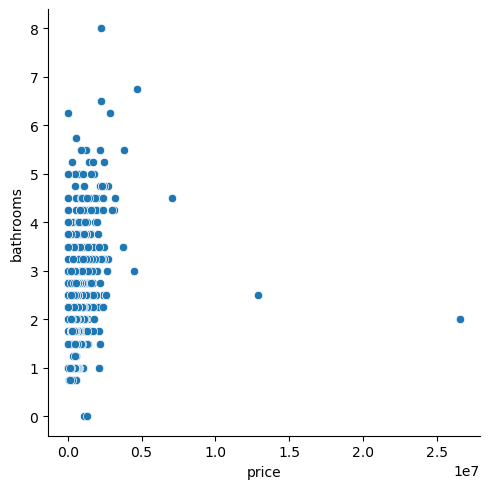

In [11]:
sns.relplot(x='price', y='bathrooms',data=data)

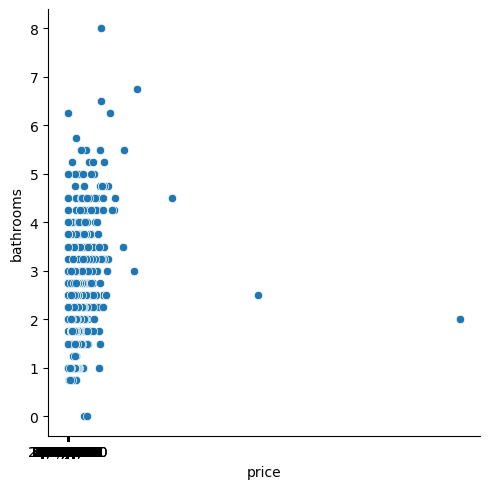

In [12]:
import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd
sns.relplot(x='price', y='bathrooms', data=data)
plt.sticks(ticks=range(len(data['price'])), labels=[f'{int(price):,}' for price in data['price']])
plt.show()

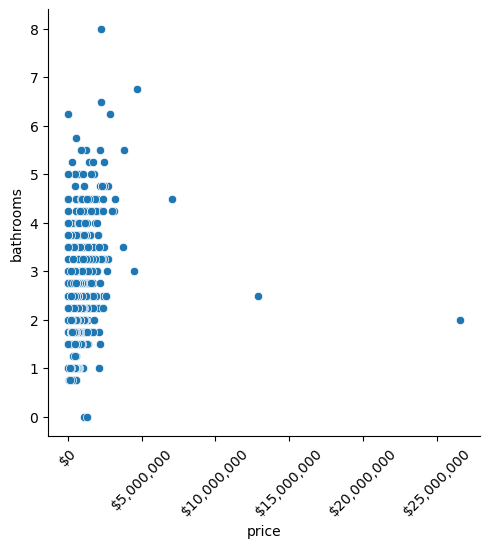

In [13]:
# Tworzenie wykresu
sns.relplot(x='price', y='bathrooms', data=data)

# Ustawianie etykiet osi x z symbolem waluty
plt.gca().xaxis.set_major_formatter(plt.FuncFormatter(lambda x, _: f'${int(x):,}'))

# Obracanie etykiet osi x
plt.xticks(rotation=45)

# Wyświetlanie wykresu
plt.show()

In [ ]:
#Rośnie liczba sypialni rośnie cena mamy czynnik windujący cenę. kolejnym może być powierzchnia uzytkowa


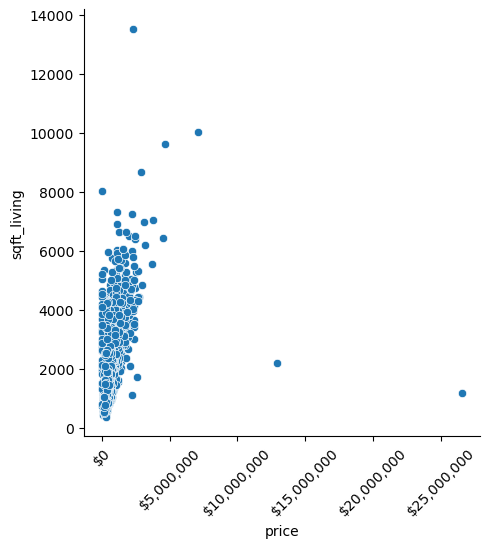

In [15]:
# Tworzenie wykresu
sns.relplot(x='price', y='sqft_living', data=data)

# Ustawianie etykiet osi x z symbolem waluty
plt.gca().xaxis.set_major_formatter(plt.FuncFormatter(lambda x, _: f'${int(x):,}'))

# Obracanie etykiet osi x
plt.xticks(rotation=45)

# Wyświetlanie wykresu
plt.show()

In [ ]:
#Ze wzrostem powierzchni użytkowej rośnie cena... kolejne powiązanie zmiennych. mamy liniową zależność...

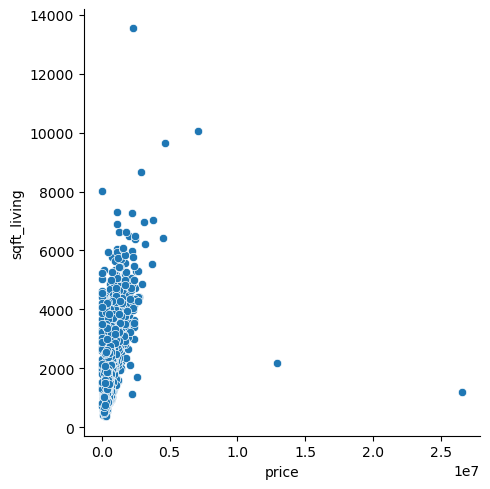

In [17]:
sns.relplot(x='price', y='sqft_living',data=data)

In [ ]:
#piętra a cena

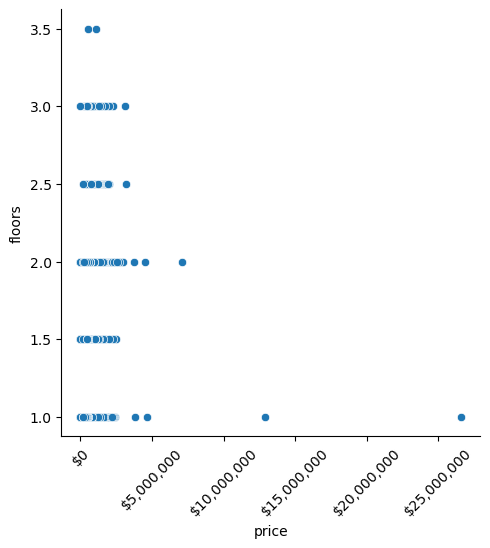

In [18]:
# Tworzenie wykresu
sns.relplot(x='price', y='floors', data=data)

# Ustawianie etykiet osi x z symbolem waluty
plt.gca().xaxis.set_major_formatter(plt.FuncFormatter(lambda x, _: f'${int(x):,}'))

# Obracanie etykiet osi x
plt.xticks(rotation=45)

# Wyświetlanie wykresu
plt.show()

In [ ]:
# najdroższe domy sa z dwoma pietrami

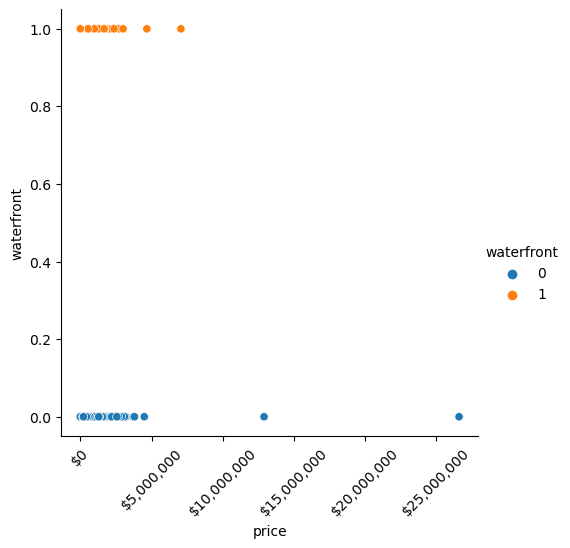

In [21]:
# Tworzenie wykresu
sns.relplot(x='price', y='waterfront', hue='waterfront', data=data)

# Ustawianie etykiet osi x z symbolem waluty
plt.gca().xaxis.set_major_formatter(plt.FuncFormatter(lambda x, _: f'${int(x):,}'))

# Obracanie etykiet osi x
plt.xticks(rotation=45)

# Wyświetlanie wykresu
plt.show()

In [ ]:
# domy z widokiem na wodę na pomairańczowo hue i to co not null to na pomarańczowo

In [ ]:
Wybieramy bedroom,bathroon ,squarefeet, floors bo te zmienne korelują nam z  ceną

In [ ]:
#  4. Tworzenie modelu-linear regression from linear models

In [23]:
from sklearn.linear_model import LinearRegression

In [ ]:
# Regresja liniowa

In [24]:
from sklearn.model_selection import train_test_split

In [ ]:
# segregacja danych do trenowania modelu

In [25]:
data.head()

,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,sqft_above,sqft_basement,yr_built,yr_renovated,street,city,statezip,country
0,2014-05-02 00:00:00,313000.0,3.0,1.50,1340,7912,1.5,0,0,3,1340,0,1955,2005,18810 Densmore Ave N,Shoreline,WA 98133,USA
1,2014-05-02 00:00:00,2384000.0,5.0,2.50,3650,9050,2.0,0,4,5,3370,280,1921,0,709 W Blaine St,Seattle,WA 98119,USA
2,2014-05-02 00:00:00,342000.0,3.0,2.00,1930,11947,1.0,0,0,4,1930,0,1966,0,26206-26214 143rd Ave SE,Kent,WA 98042,USA
3,2014-05-02 00:00:00,420000.0,3.0,2.25,2000,8030,1.0,0,0,4,1000,1000,1963,0,857 170th Pl NE,Bellevue,WA 98008,USA
4,2014-05-02 00:00:00,550000.0,4.0,2.50,1940,10500,1.0,0,0,4,1140,800,1976,1992,9105 170th Ave NE,Redmond,WA 98052,USA


In [ ]:
# Usuwamy następujace kolumny z zestawu danych do trenowania modelu.  cena bo nie może być w zestawie jej predykcji szukamy, 

In [ ]:
# id nie jest nam potrzebne do niczego podobnie data. Pod kolumnami,które usunelismy wpisujemy to czego szukamy do predykcji

In [ ]:
# usuwam wszystkie kolumny ze stringami przewiduję cene wiec test =data['price']

In [46]:
train = data.drop(['price', 'date', 'street','city', 'statezip', 'country' ], axis=1)
test = data['price']

In [ ]:
#train test split method używamy do podziału na training i test set

In [47]:
X_train, X_test, y_train, y_test = train_test_split(train, test,test_size=0.3, random_state=2) 

In [ ]:
# train_test-split metoda
# X_train:

# Zawiera cechy (features) ze zbioru treningowego.
# To dane, na których model będzie trenowany.
# Zwykle stanowi 70% całego zbioru danych (w tym przypadku).


# X_test:

# Zawiera cechy ze zbioru testowego.
# Służy do oceny wydajności modelu na niewidzianych danych.
# W tym przypadku stanowi 30% całego zbioru danych.


# y_train:

# Zawiera etykiety (labels) lub wartości docelowe dla zbioru treningowego.
# Odpowiada wartościom w X_train.


# y_test:

# Zawiera etykiety lub wartości docelowe dla zbioru testowego.
# Odpowiada wartościom w X_test.



# Parametry funkcji train_test_split:

# train: zawiera cechy (features)
# test: zawiera etykiety (labels)
# test_size=0.3: oznacza, że 30% danych będzie przeznaczone na zbiór testowy
# random_state=2: zapewnia powtarzalność podziału danych

# Ten podział pozwala na trenowanie modelu na jednym zestawie danych (X_train, y_train) i testowanie jego wydajności na innym, niezależnym zestawie (X_test, y_test), co pomaga w ocenie, jak dobrze model generalizuje się na nowe dane.

użyamy Liniowej regesji =>regr=LinearRegression()  

In [ ]:
# # egr regressor
# EGR Regressor to skrót od "Elastic Net with Gradient Regularization Regressor". Jest to technika regresji, która łączy w sobie cechy kilku innych metod regresji. Oto kluczowe informacje o EGR Regressor:

# Podstawa:

# Bazuje na elastycznej sieci (Elastic Net), która sama w sobie jest kombinacją regresji lasso i regresji grzbietowej.


# Główne cechy:

# Łączy regulację L1 (lasso) i L2 (ridge).
# Dodaje regulację gradientu, co pomaga w stabilizacji modelu.


# Zalety:

# Dobrze radzi sobie z problemem współliniowości (gdy cechy są silnie skorelowane).
# Może wykonywać selekcję cech, eliminując nieistotne predyktory.
# Jest odporny na przeuczenie, szczególnie w przypadku danych o wysokiej wymiarowości.


# Zastosowania:

# Szczególnie przydatny w przypadkach, gdy mamy wiele cech, które mogą być ze sobą skorelowane.
# Często stosowany w analizie danych finansowych, biomedycznych i innych dziedzinach z złożonymi, wielowymiarowymi danymi.


# Parametry:

# Pozwala na dostrojenie wagi między regulacją L1 i L2.
# Umożliwia kontrolę siły regulacji gradientu.


# Implementacja:

# Dostępny w niektórych bibliotekach uczenia maszynowego, choć może nie być tak powszechny jak prostsze modele regresji.






In [48]:
regr=LinearRegression()  

In [ ]:
# metoda fit xtrain and xy train data musi ona wchodzić tutaj

In [49]:
regr.fit(X_train, y_train)

LinearRegression()

In [31]:
# data.head()

,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,sqft_above,sqft_basement,yr_built,yr_renovated,street,city,statezip,country
0,2014-05-02 00:00:00,313000.0,3.0,1.50,1340,7912,1.5,0,0,3,1340,0,1955,2005,18810 Densmore Ave N,Shoreline,WA 98133,USA
1,2014-05-02 00:00:00,2384000.0,5.0,2.50,3650,9050,2.0,0,4,5,3370,280,1921,0,709 W Blaine St,Seattle,WA 98119,USA
2,2014-05-02 00:00:00,342000.0,3.0,2.00,1930,11947,1.0,0,0,4,1930,0,1966,0,26206-26214 143rd Ave SE,Kent,WA 98042,USA
3,2014-05-02 00:00:00,420000.0,3.0,2.25,2000,8030,1.0,0,0,4,1000,1000,1963,0,857 170th Pl NE,Bellevue,WA 98008,USA
4,2014-05-02 00:00:00,550000.0,4.0,2.50,1940,10500,1.0,0,0,4,1140,800,1976,1992,9105 170th Ave NE,Redmond,WA 98052,USA


In [35]:
data.columns

Index(['date', 'price', 'bedrooms', 'bathrooms', 'sqft_living', 'sqft_lot',
       'floors', 'waterfront', 'view', 'condition', 'sqft_above',
       'sqft_basement', 'yr_built', 'yr_renovated', 'street', 'city',
       'statezip', 'country'],
      dtype='object')

In [ ]:
# Prediction dla jednej zmiennej

In [51]:
pred = regr.predict(X_test)

In [52]:
pred 

array([ 330495.16388012,  305112.52375125,  707310.97912585, ...,
       1116934.72499034,  998489.37925045,  365558.3077572 ])

In [ ]:
# Sprawdzenie wydajnosci efektywnosci modelu:


In [54]:
regr.score(X_test, y_test)

0.09075236941367415

In [ ]:
# Dobry wynik dokładności